## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')


# Display the data table for preview
combined_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
combined_mice_df.to_csv("dataframemice.csv", encoding='utf-8', index=False, header=True)

PermissionError: [Errno 13] Permission denied: 'dataframemice.csv'

In [3]:
# Checking the number of mice.

k = combined_mice_df.value_counts('Mouse ID')
k.head()

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
dtype: int64

In [25]:
q = k.loc[0,0]
q

IndexingError: Too many indexers

In [4]:
total_mice = combined_mice_df['Mouse ID'].count()
total_mice

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# previousmouse=0
# previoustimepoint= 0
# for row in combined_mice_df:
#     if (row[0]=previousmouse) & (row[5]= previoustimepoint):
#     combined_mice_df.drop(row)
    
# previousmouse=row[0]
# previoustimepoint= row[5]
    




In [6]:
# Optional: Get all the data for the duplicate mouse 
duplicate= combined_mice_df.loc[combined_mice_df['Mouse ID'] == 'g989',:]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleandata = combined_mice_df[combined_mice_df['Mouse ID'] != 'g989']
cleandata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
cleandata['Mouse ID'].count()

1880

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary = cleandata.groupby('Drug Regimen')
                                  
sum_mean = summary['Tumor Volume (mm3)'].mean()
                 
sum_mean



Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [40]:
sum_median = summary['Tumor Volume (mm3)'].median()
sum_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [41]:
sum_variance = summary.var()
sum_variance

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,48.251655,2.933995,187.050699,43.852013,1.224306
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [42]:
sum_var_loc = sum_variance.iloc[:,3]
sum_var_loc

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [43]:
sum_std = summary.std()
sum_std


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,6.946341,1.712891,13.676648,6.622085,1.106484
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [44]:
sum_std_loc = sum_std.iloc[:,3]
sum_std_loc

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [45]:
sum_sem = summary.sem()
sum_sem

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,0.509136,0.180169,0.948518,0.329346,0.055981
Ceftamin,0.604977,0.118535,1.070629,0.469821,0.088766
Infubinol,0.562919,0.163684,1.009879,0.492236,0.076985
Ketapril,0.439030,0.134333,1.023238,0.603860,0.101659
Naftisol,0.492430,0.109930,1.040081,0.596466,0.089200
Placebo,0.472356,0.136615,1.032495,0.581331,0.099514
Propriva,0.570986,0.140799,1.124214,0.544332,0.090952
Ramicane,0.393825,0.214244,0.945433,0.320955,0.045780
Stelasyn,0.590143,0.122169,1.028921,0.573111,0.072252


In [46]:
sum_sem_loc = sum_sem.iloc[:,3]
sum_sem_loc

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [49]:
auth_mean = pd.Series(sum_mean)
auth_median = pd.Series(sum_median)
auth_var = pd.Series(sum_var_loc)
auth_std = pd.Series(sum_std_loc)
auth_sem = pd.Series(sum_sem_loc)



In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


df_sum = pd.DataFrame({"mean":[auth_mean], "median":[auth_median], "variance":[auth_var], "standard deviation": [auth_std], "SEM of the tumor volume for each regimen" : [auth_sem]})

df_sum

,mean,median,variance,standard deviation,SEM of the tumor volume for each regimen
0,Drug Regimen Capomulin 40.675741 Ceftamin ...,Drug Regimen Capomulin 41.557809 Ceftamin ...,Drug Regimen Capomulin 24.947764 Ceftamin ...,Drug Regimen Capomulin 4.994774 Ceftamin ...,Drug Regimen Capomulin 0.329346 Ceftamin ...


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

    


In [56]:
#summary = cleandata.groupby('Drug Regimen')
                                  
sum_count = summary.count()
                 
sum_count

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [68]:
summary_count= sum_count.iloc[:,0]
summary_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<AxesSubplot:xlabel='Drug Regimen'>

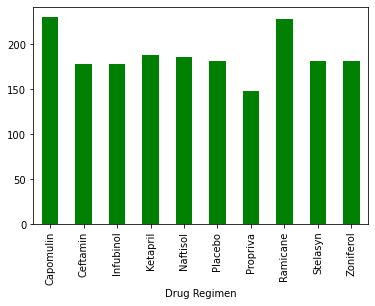

In [58]:
summary_count.plot(kind="bar", facecolor="green")

In [69]:
%matplotlib notebook

In [70]:
import matplotlib.pyplot as plt

In [73]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_names = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
measurements = summary_count
x_axis = np.arange(len(drug_names))

<IPython.core.display.Javascript object>


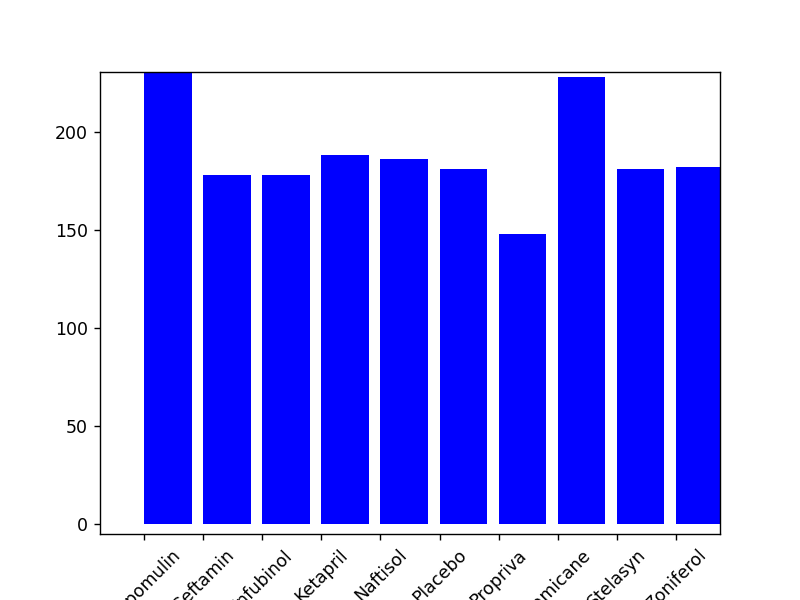

<BarContainer object of 10 artists>

In [74]:
plt.bar(x_axis,measurements, color="b", align="edge")

In [82]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation=45)

([<matplotlib.axis.XTick at 0x23217d6c6a0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

In [76]:
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 9.75)

In [81]:
plt.ylim(0, max(measurements)+0.4)

(0.0, 230.4)

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#malefemale_sum = cleandata

#malefemale_id = cleandata.groupby('Mouse ID')
#malefemale_sum = malefemale_id.count()

malefemale_sum = cleandata.drop_duplicates(subset='Mouse ID')

Final_data = malefemale_sum["Sex"].value_counts()

Final_data

Male      125
Female    123
Name: Sex, dtype: int64

In [115]:
#female_data= cleandata.loc[cleandata['Sex']=='Female', :]
#female_data

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
